In [13]:
import torch 

In [14]:
g_model = torch.load("../results/south-building/ckpts/ckpt_6999_rank0.pt", map_location="cuda:0", weights_only=True)

In [15]:
g_model.keys()

dict_keys(['step', 'splats'])

In [16]:
g_model['splats']

OrderedDict([('means',
              tensor([[-0.0473, -0.1534,  0.3896],
                      [ 0.2236, -0.1885,  0.1588],
                      [-0.1035, -0.0982,  0.3136],
                      ...,
                      [-0.1242,  1.0988, -0.0550],
                      [ 0.5121,  0.8483, -0.2970],
                      [ 1.6732,  1.6350,  0.3415]], device='cuda:0')),
             ('opacities',
              tensor([ 0.5801,  0.4425, -0.3294,  ...,  6.6305,  4.0122, 12.1850],
                     device='cuda:0')),
             ('quats',
              tensor([[ 0.9700,  1.0641,  0.4940,  0.7112],
                      [ 0.6004,  0.5498,  0.4192,  0.6352],
                      [ 1.0225, -0.3401,  1.0428,  0.2486],
                      ...,
                      [ 0.1863,  0.3159,  0.8543,  0.6108],
                      [ 0.5599,  0.1666,  0.3180,  0.7947],
                      [ 0.7756,  0.6165,  0.3271,  0.2327]], device='cuda:0')),
             ('scales',
              tensor

In [17]:
g_model['splats'].keys()

odict_keys(['means', 'opacities', 'quats', 'scales', 'sh0', 'shN'])

In [18]:
g_model['splats']['means']

tensor([[-0.0473, -0.1534,  0.3896],
        [ 0.2236, -0.1885,  0.1588],
        [-0.1035, -0.0982,  0.3136],
        ...,
        [-0.1242,  1.0988, -0.0550],
        [ 0.5121,  0.8483, -0.2970],
        [ 1.6732,  1.6350,  0.3415]], device='cuda:0')

In [19]:
g_model['splats']['opacities']

tensor([ 0.5801,  0.4425, -0.3294,  ...,  6.6305,  4.0122, 12.1850],
       device='cuda:0')

In [20]:
g_model['splats']['quats']

tensor([[ 0.9700,  1.0641,  0.4940,  0.7112],
        [ 0.6004,  0.5498,  0.4192,  0.6352],
        [ 1.0225, -0.3401,  1.0428,  0.2486],
        ...,
        [ 0.1863,  0.3159,  0.8543,  0.6108],
        [ 0.5599,  0.1666,  0.3180,  0.7947],
        [ 0.7756,  0.6165,  0.3271,  0.2327]], device='cuda:0')

In [21]:
g_model['splats']['scales']

tensor([[-3.6856, -4.5007, -4.1013],
        [-6.2502, -5.2591, -5.4123],
        [-4.5813, -5.6028, -5.9347],
        ...,
        [-9.2765, -4.0383, -4.6604],
        [-4.2997, -6.9169, -5.8656],
        [-5.6182, -4.5578, -2.3529]], device='cuda:0')

In [22]:
g_model['splats']['sh0']

tensor([[[ 1.6426,  1.6522,  1.6482]],

        [[ 0.2084, -0.0294, -0.1009]],

        [[-0.0896, -0.4920, -0.5634]],

        ...,

        [[ 0.9499,  0.9503,  0.8705]],

        [[ 0.4267,  0.2004,  0.3533]],

        [[ 1.9492,  1.9513,  2.1186]]], device='cuda:0')

In [23]:
viewmats = torch.eye(4, device="cuda:0")[None, :, :]

In [24]:
Ks = torch.tensor([
   [300., 0., 150.], [0., 300., 100.], [0., 0., 1.]], device="cuda:0")[None, :, :]

In [33]:
width, height = 768, 576

In [34]:
from gsplat import rasterization

colors, alphas, meta = rasterization(
   g_model['splats']['means'], g_model['splats']['quats'], g_model['splats']['scales'], g_model['splats']['opacities'], g_model['splats']['sh0'], viewmats, Ks, width, height, sh_degree=0
)

KeyboardInterrupt: 

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

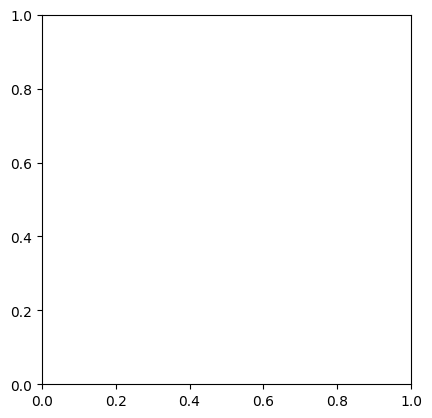

In [32]:
from matplotlib import pyplot as plt

plt.imshow(colors.cpu().detach().numpy())